# Credit Card Fraud Detection Dataset 2023
The used dataset is: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

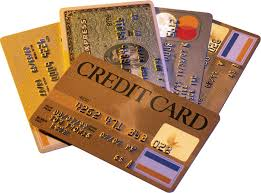

Dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

#### Data Card
* **id**: Unique identifier for each transaction
* **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
* **Amount**: The transaction amount
* **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)

**Target**

The aim of this notebook is to apply my personal knowledge of data science techniques.

In particular, I'll apply the data science flow to the above mentioned dataset.

Steps are:

* **Data Wrangling**
* **Data Exploration**
* **Model Building**
* **Model Evaluation**
* **Discussion**

In [41]:
#dataset import and cleaning
import numpy as np
import pandas as pd

#data visualization and model scoring
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


#Model-building
##ML models
from xgboost import XGBClassifier
#unsupervised_models
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
##DL models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
#Reinforcement Learning Env
import torch
import torch.nn as nn
import gymnasium as gym
from gymnasium import spaces

#Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

## A) Data Wrangling and Exploration

### A.1) Data Wrangling
It's common that data cannot be instantly used after they have been acquired, and it is fundamental to process them using the well-known data science techniques:
* Missing values handling
* NaN replacement
* Regularization (it can be also made after the exploration)

In [2]:
input_url = '/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv'
df = pd.read_csv(input_url)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


the id columns is redundant so I'm dropping it 

In [3]:
df.drop(labels="id", inplace= True, axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

Wow, pretty remarkable. 

This dataset is perfecly formatted and there aren't any Null and NaN values

Good Job Nidula Elgiriyewithana

It seems there're no more steps to do. I'll do regularization later

### A.2) Data Exploration

I'm going to verify eventual correlations with Class columns. Maybe there coud be some parameters which are distributed in some meaningful way.

In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
df.groupby('Class')["Amount"].count()

Class
0    284315
1    284315
Name: Amount, dtype: int64

Interesting, dataset is equally distributed

#### A.2.1) Amount

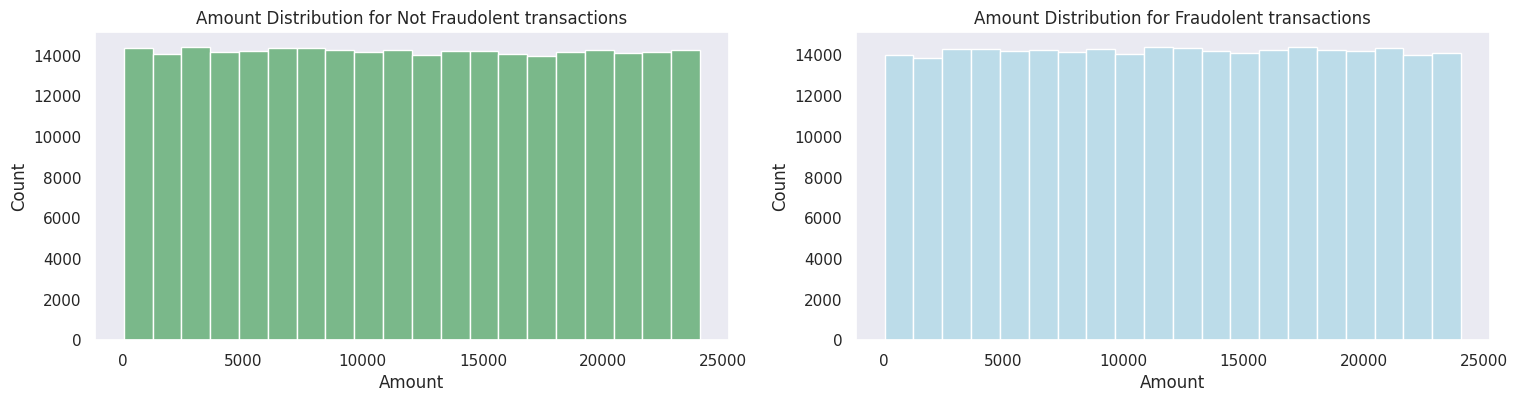

In [7]:
sns.set(rc={"figure.figsize":(18, 4)})
plt.subplot(1,2,1)
sns.histplot(df[df["Class"] == 0], 
             x="Amount", 
             color="g",
             bins=20);
plt.title("Amount Distribution for Not Fraudolent transactions")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.grid(False)
plt.subplot(1,2,2)
sns.histplot(df[df["Class"] == 1], 
             x="Amount", 
             color='lightblue',
             bins=20);
plt.title("Amount Distribution for Fraudolent transactions")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.grid(False)

It seems Amount is not a good parameter for discovering fraudolent transactions.

It is a perfect uniform distribution.

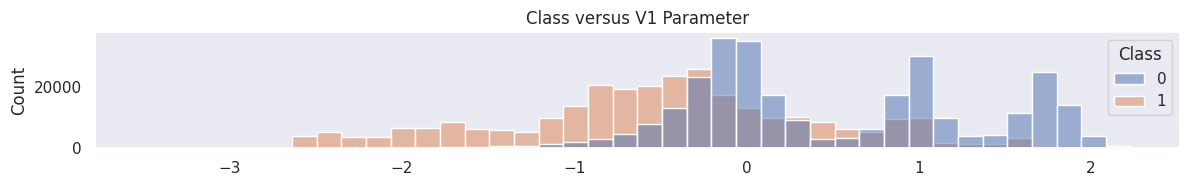

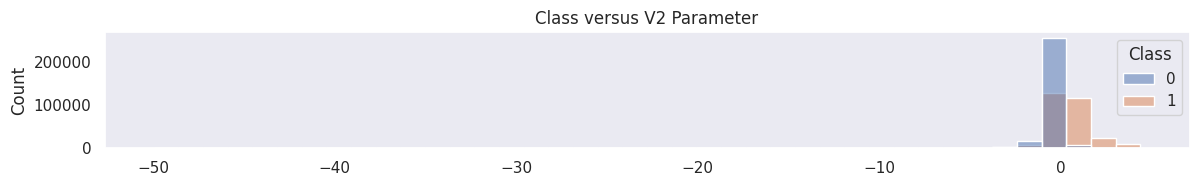

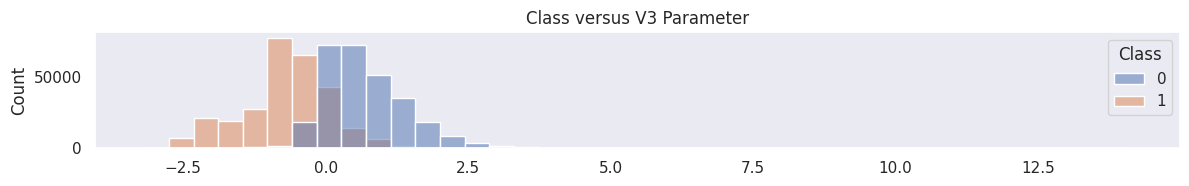

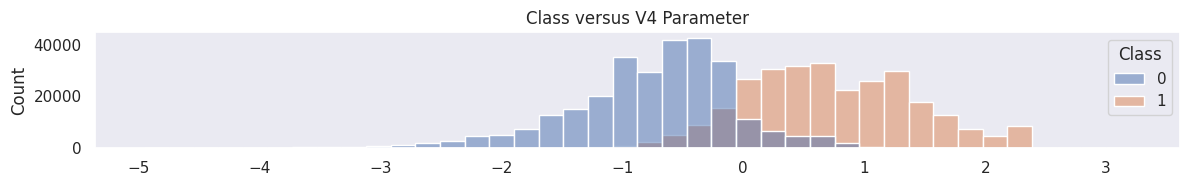

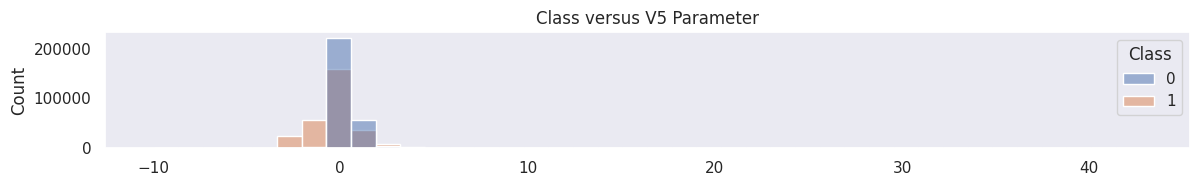

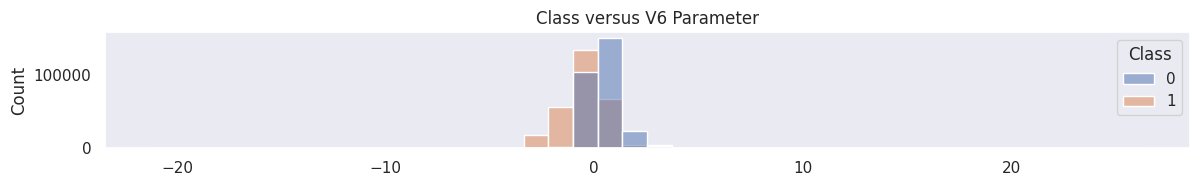

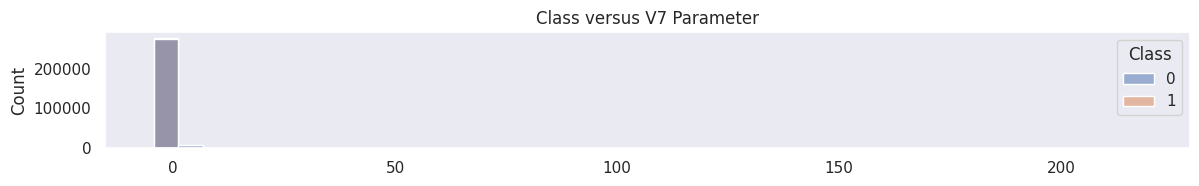

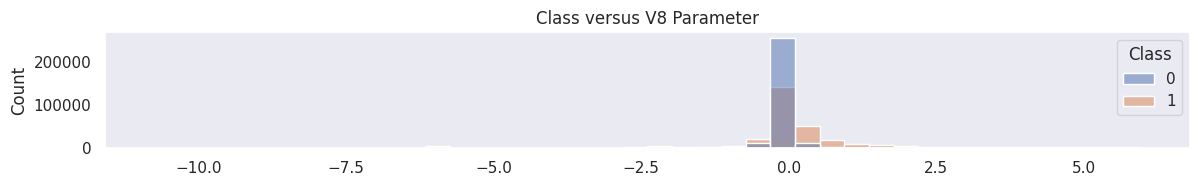

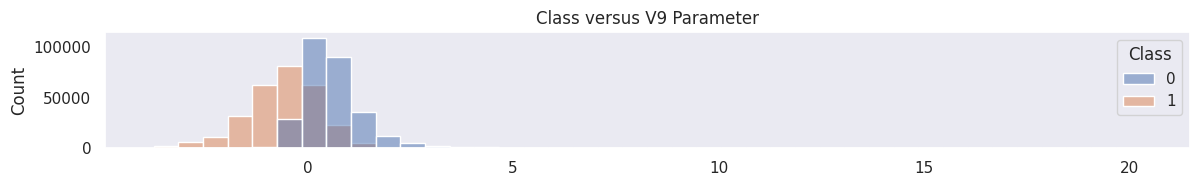

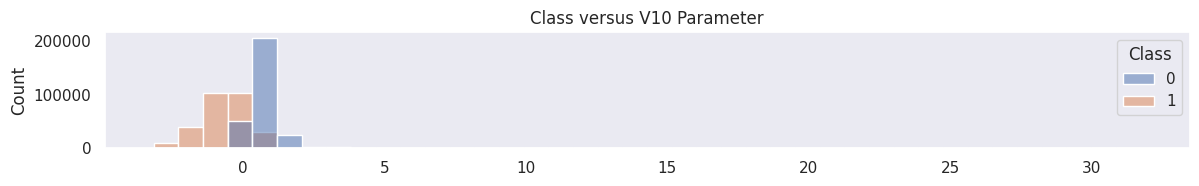

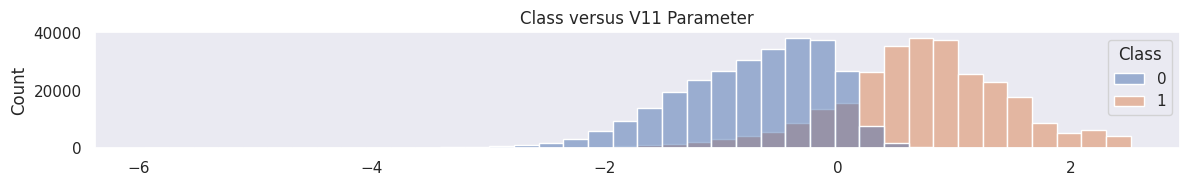

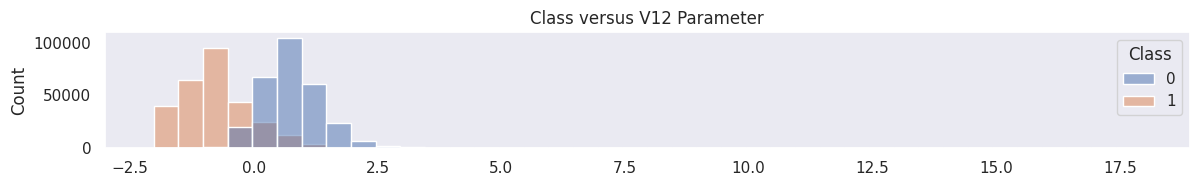

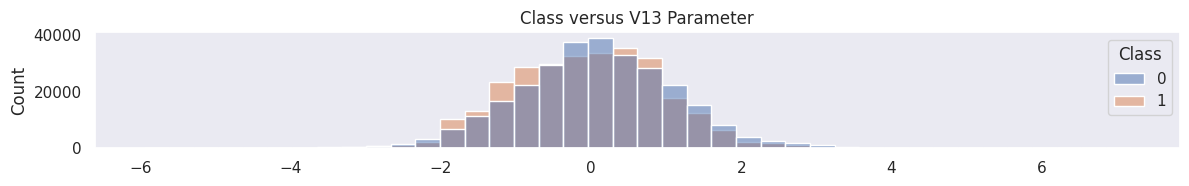

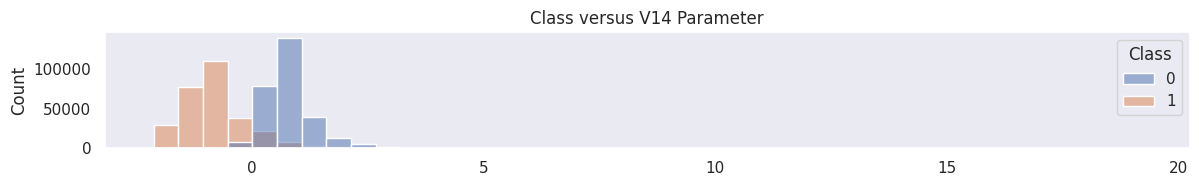

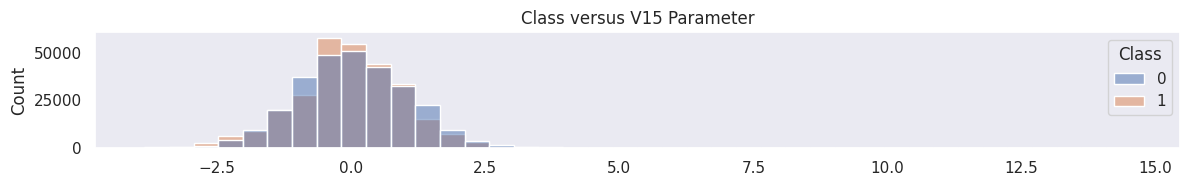

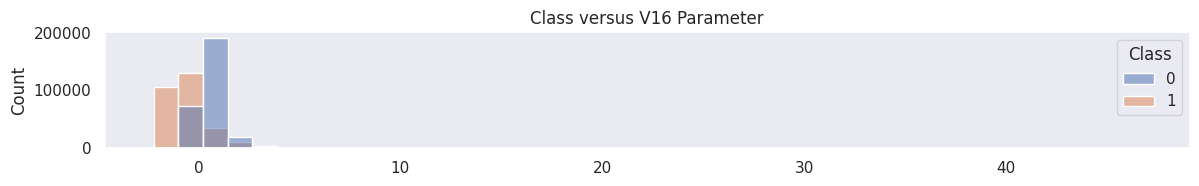

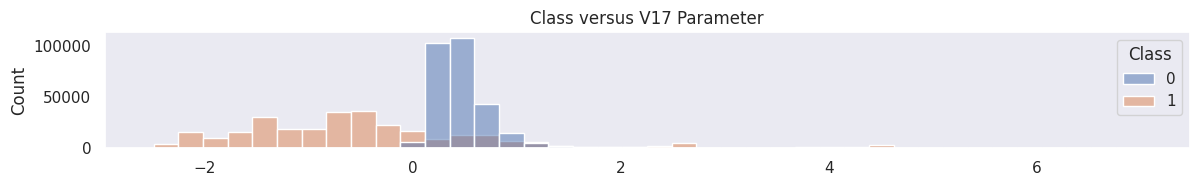

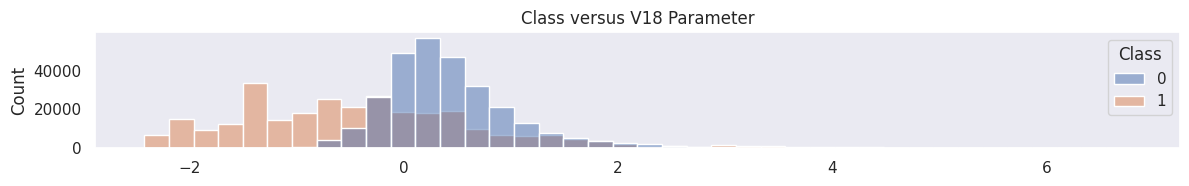

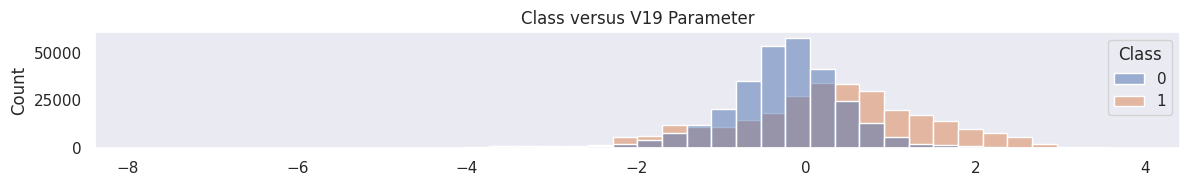

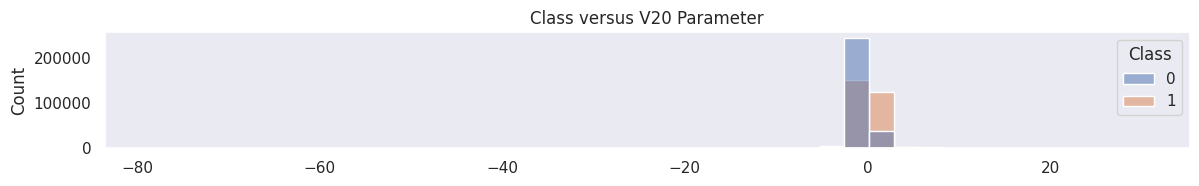

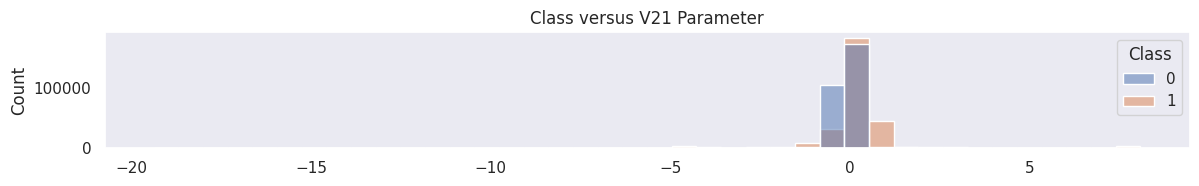

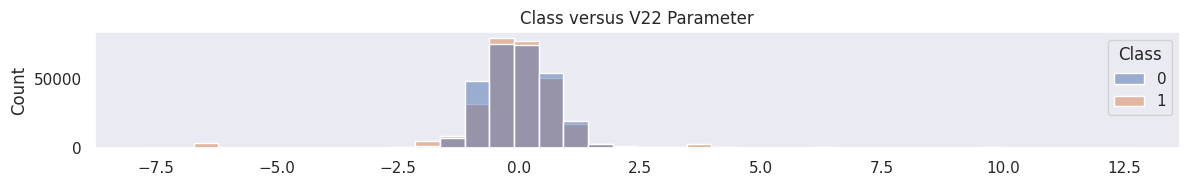

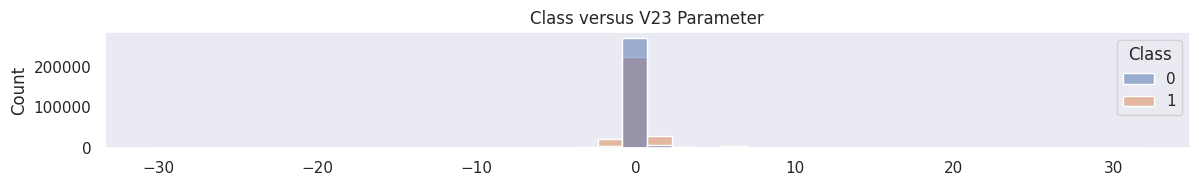

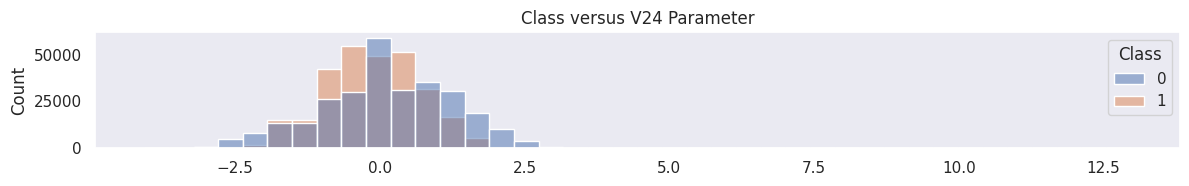

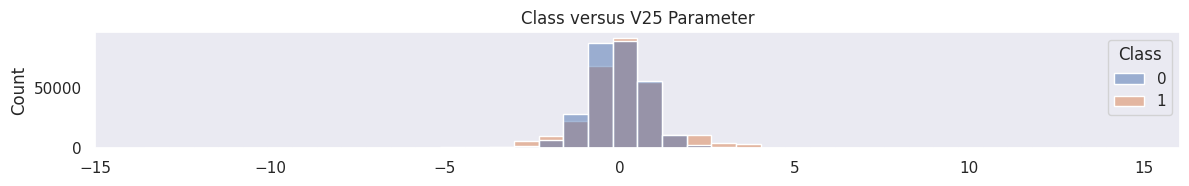

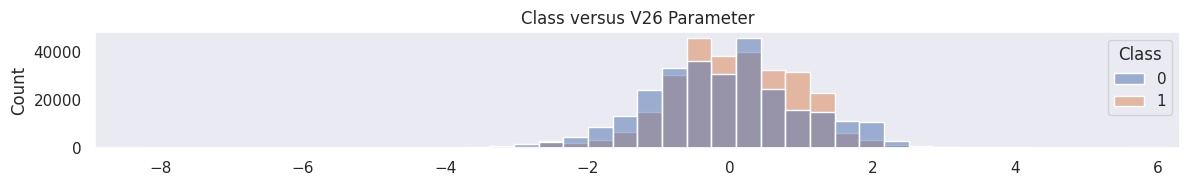

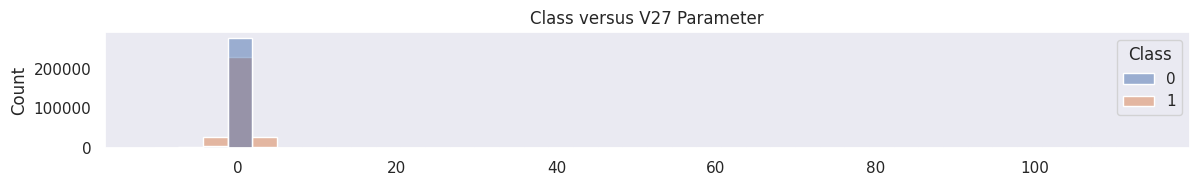

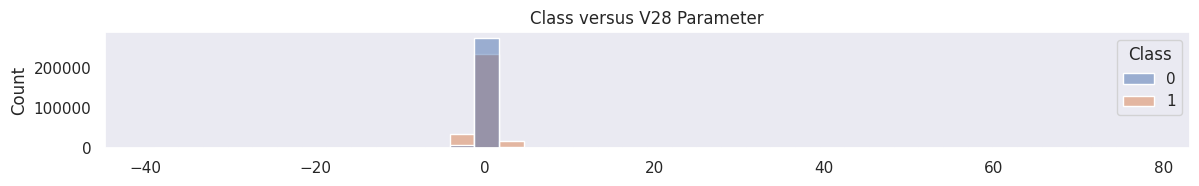

<Figure size 1400x150 with 0 Axes>

In [8]:
sns.set(rc={"figure.figsize":(14, 1.5)});
    
for index in range(1, 29):
    plt.figure(index)
    sns.histplot(df, 
                 x=f"V{index}",
                 hue="Class",
                 bins = 40);
    plt.title(f"Class versus V{index} Parameter")
    plt.xlabel(None)
    plt.ylabel("Count")
    plt.grid(False)
    plt.show();
plt.tight_layout();

These distributions give a lot of insights, but they key concept is that there are some of V parameters which are more talkative than others. In particular, there are some distribution which are abruptly class defined:

**V3, V4, V9, V10, V11, V12, V14, V16, V17, V18**.

The other ones tell us less or almost nothing in few cases.

One idea might be to drop all the less meaningful columns or maybe the one which Fraudolent and Non-Fraudolent distributions are totally overlapped or look too similar. 

Considering that, I drop these last.

A formal method consists in evaluating the intersection over union (IoU) of the Fraudolent and Non-Fraudolent distribution areas. After, a threshold value of IoU should be defined and the charts with IoU over threshold should be discarded.

A less formal method is the eye-method. I'll pursue it.

Then, let's drop **V7, V8, V13, V15, V21, V22, V25, V26**

In [9]:
to_be_dropped = ["V7", "V8", "V13", "V15", "V21", "V22", "V25", "V26"]
df.drop(to_be_dropped, inplace=True, axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V9,V10,V11,V12,...,V17,V18,V19,V20,V23,V24,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.727159,0.637735,-0.987020,0.293438,...,0.512307,0.333644,0.124270,0.091202,-0.134794,0.165959,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.347452,0.529808,0.140107,1.564246,...,0.403810,0.201799,-0.340687,-0.233984,0.079469,-0.577395,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,-0.261297,0.690708,-0.272985,0.659201,...,0.886526,0.239442,-2.366079,0.361652,0.945045,-1.154666,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,-0.205698,0.575231,-0.752581,0.737483,...,0.242629,2.178616,-1.345060,-0.378223,-0.214048,-1.893131,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,1.049921,0.968046,-1.203171,1.029577,...,0.366466,0.291782,0.445317,0.247237,-0.161666,0.312561,0.023712,0.419117,14278.97,0


### A.3) Dataset Preparation
I'll split dataset in train and test sets with ratio 98%, 2%.

In [10]:
X = df.drop("Class", axis=1)
Y = df["Class"]

At this point it's important to define which type of regularization or normalization must be done over the dataset.

Considering that I have three choices:
* **Simple scaling**: Columns are divided by higher self column's value, making X between [0, 1].
* **Min-Max scaling**: Xnew = ( X - min(X) )/ ( max(X) - min(X) ), making X between [0, 1].
* **Z-score scaling**: columns are subtracted by their own mean and after divided by their own standard deviation, making X between ~[-3, +3].

*For completeness, all three possibilities should be considered and the different scaling processes compared during model development*.

I choose **Min-Max** scaling just because I want to keep distribution as they currently are and I have no much time to dedicate to that.

In [11]:
#Min-Max regularization
for column in X.columns:
    X[column] = (X[column] - X[column].min())/(X[column].max() - X[column].min())

In [12]:
#Min value check
X.describe().loc["min", :]

V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V14       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V23       0.0
V24       0.0
V27       0.0
V28       0.0
Amount    0.0
Name: min, dtype: float64

In [13]:
#Max values check
X.describe().loc["max", :]

V1        1.0
V2        1.0
V3        1.0
V4        1.0
V5        1.0
V6        1.0
V9        1.0
V10       1.0
V11       1.0
V12       1.0
V14       1.0
V16       1.0
V17       1.0
V18       1.0
V19       1.0
V20       1.0
V23       1.0
V24       1.0
V27       1.0
V28       1.0
Amount    1.0
Name: max, dtype: float64

Regularization worked

**Train-Test splitting**

In [14]:
x_trainbk, x_testbk, y_trainbk, y_testbk = train_test_split(X, 
                                                            Y, 
                                                            test_size=0.02, 
                                                            random_state=0)
print(f"X train shape: {x_trainbk.shape}")
print(f"X test shape: {x_testbk.shape}")

X train shape: (557257, 21)
X test shape: (11373, 21)


## B) Model Building

This section is reserved for model building and development. 

There are a lot of solutions of models for making previsions and forecast, with both supervised learning and unsupervised learning.

**Supervised Learning (Machine Learning)**
* Random Forest
* XGBoost
* Support Vector Machines
* Simple Logistic Regression

**Supervised Learning (Deep Learning)**
* Fully Connected Neural Networks
* Neural Newtork with Convolutions

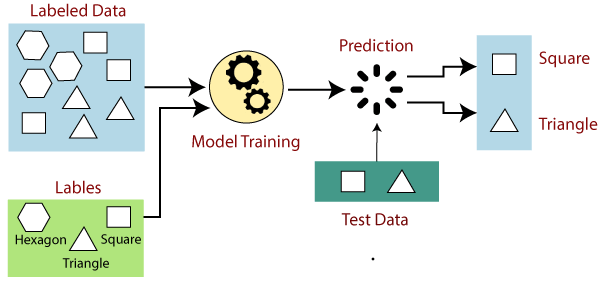

**Unsupervised Learning**
* Clustering and anomaly detection

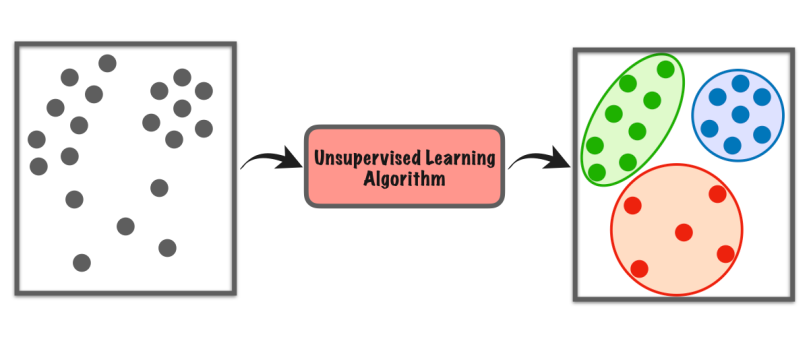

**Reinforcement Learning**
* Markov decision process (MDP)
* Bellman equation.
* Deep-Q

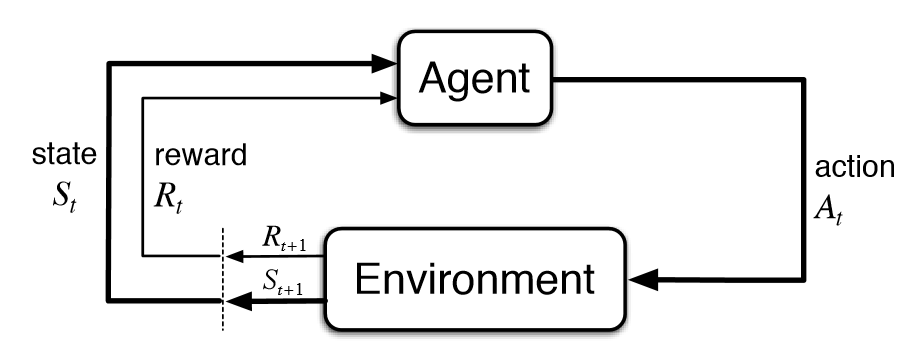

In this last case, the agent insted of classifying images and making correct decision, it has to classify a 21-channel pseudo pixel images. What does it mean?

There are 557257 samples with 21 features per sample in the training set. So, It could be a way to see it as a single pixel image in float [0 to 1] scale, instead of uint8 0 to 255, with 21 channels instead of the common 3-channel RGB system.
It is not really that, but it is a way to see the system that might be developed using reinforcement learning.

Because of time problem, I cannot consider, implement and compare all the solutions I presented above.
Therefore, I had chosen one solution per learning procedure and after I implemented them:

* **Supervised Learning (ML)**: XGBoost
* **Supervised Learning (DL)**: Fully Connected Neural Networks
* **Unsupervised Learning**: Clustering
* **Reinforcement Learning**: REINFORCE using openGym

### B.1) Supervised Learning (ML)

#### XGBOOST Classifier

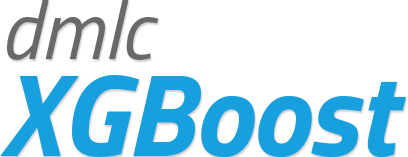

In [15]:
#Iterate through learning rate, in order to check witch is the better for XGBOOST
r2_score = []
pipe = []
lr_arr = np.linspace(1e-4, 1e-1, 8)
for index,lr in enumerate(lr_arr):
    print("---------------------------")
    print(f'{"Learning Rate:" :<17}{lr: <.6f}')
    print("---------------------------")
    pipe_in = [('model', XGBClassifier(eta = lr))]
    pipe.append(Pipeline(pipe_in))
    pipe[index].fit(x_trainbk, y_trainbk)
    r2_score.append(pipe[index].score(x_testbk, y_testbk))

---------------------------
Learning Rate:   0.000100
---------------------------
---------------------------
Learning Rate:   0.014371
---------------------------
---------------------------
Learning Rate:   0.028643
---------------------------
---------------------------
Learning Rate:   0.042914
---------------------------
---------------------------
Learning Rate:   0.057186
---------------------------
---------------------------
Learning Rate:   0.071457
---------------------------
---------------------------
Learning Rate:   0.085729
---------------------------
---------------------------
Learning Rate:   0.100000
---------------------------


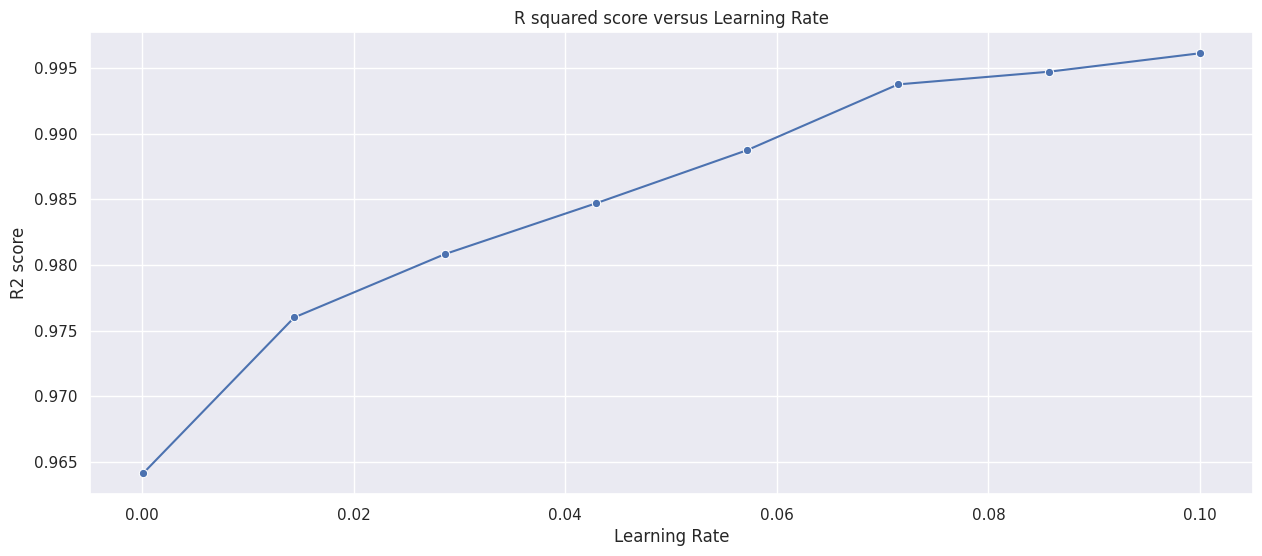

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(y=r2_score, x= lr_arr, marker="o")
plt.title("R squared score versus Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("R2 score");

In [17]:
print(f"Maximum R2 score: {max(r2_score) :<.4f}")
print(f"Learning Rate: {lr_arr[r2_score.index(max(r2_score))] :<.4f}")

Maximum R2 score: 0.9961
Learning Rate: 0.1000


Not Bad, the first model's able to predict the 99.6% of test set!!

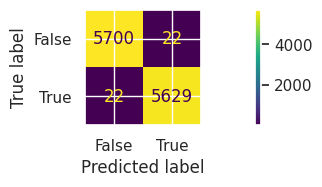

In [18]:
y_hat = pipe[r2_score.index(max(r2_score))].predict(x_testbk)

cm = confusion_matrix(y_testbk, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = [False, True])
disp.plot()
plt.show()

Very Good Result

### B.2) Supervised Learning (DL)

I am going to develop a Fully Connected Neural Network, which structure is represented by chart below

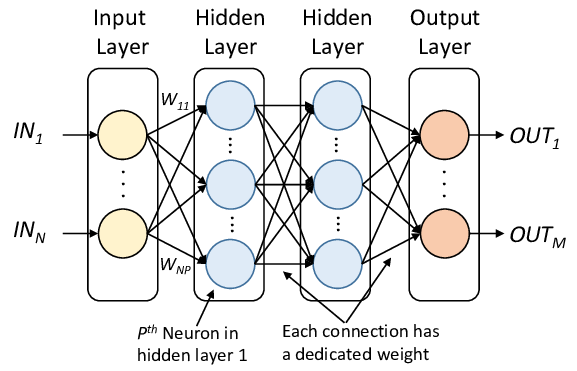

In [19]:
#model definition
a0 = tf.keras.Input(shape=(x_trainbk.shape[1], 1))
a1 = tf.keras.layers.Dense(64, 
                           activation = 'relu', 
                           kernel_initializer='he_normal')(a0)
a2 = tf.keras.layers.BatchNormalization()(a1)
a3 = tf.keras.layers.Dense(2048, 
                           activation = 'relu', 
                           kernel_initializer='he_normal')(a2)
a4 = tf.keras.layers.BatchNormalization()(a3)
a5 = tf.keras.layers.Dense(1024, 
                           activation = 'relu', 
                           kernel_initializer='he_normal',
                           bias_regularizer=tf.keras.regularizers.l2(1e-4),
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4))(a4)
a6 = tf.keras.layers.BatchNormalization()(a5)
a7 = tf.keras.layers.Dense(512, 
                           activation = 'relu', 
                           kernel_initializer='he_normal',
                           bias_regularizer=tf.keras.regularizers.l2(1e-4),
                           kernel_regularizer=tf.keras.regularizers.l2(1e-4))(a6)
a8 = tf.keras.layers.BatchNormalization()(a7)
a9 = tf.keras.layers.Dense(1024, 
                           activation = 'relu', 
                           kernel_initializer='he_normal')(a8)
a10 = tf.keras.layers.BatchNormalization()(a9)
a11 = tf.keras.layers.Dense(128, 
                           activation = 'relu', 
                           kernel_initializer='he_normal')(a8)
a12 = tf.keras.layers.BatchNormalization()(a11)
a13 = tf.keras.layers.Dense(512, 
                           activation = 'relu', 
                           kernel_initializer='he_normal')(a12)
a14 = tf.keras.layers.BatchNormalization()(a13)
a15 = tf.keras.layers.Dense(1,
                           activation = 'sigmoid',
                           kernel_initializer='he_normal',
                           bias_initializer='random_uniform')(a14)

model = tf.keras.Model(inputs=a0, outputs=a15)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21, 1)]           0         
                                                                 
 dense (Dense)               (None, 21, 64)            128       
                                                                 
 batch_normalization (BatchN  (None, 21, 64)           256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 21, 2048)          133120    
                                                                 
 batch_normalization_1 (Batc  (None, 21, 2048)         8192      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 21, 1024)          209817

In [22]:
flag = True
class StopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ( logs.get('val_accuracy') > 0.96 and \
             logs.get('val_accuracy') is not None): 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True
            global flag 
            flag = False
            
class PrintCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 25 == 0 and \
            logs.get('val_accuracy') is not None and \
            logs.get('accuracy') is not None):
            print(f"Epoch: {epoch: <6}")
            print(f"{'Valid_acc: ' :<6}{logs.get('val_accuracy') : <7.4f}")
            print(f"{'Train_acc: ' :<6}{logs.get('accuracy') : <7.4f}")
            
sp_cb = StopCallback()
check_cb = PrintCallback()

In [23]:
epochs_a = [5, 5, 5, 5, 5]
lr_a =     [1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
history = []
for epochs, lr in zip(epochs_a, lr_a):
    if (flag == True):
        print("###############")
        print(f"Epochs : {epochs}")
        print(f"L.Rate : {lr}")
        print("###############")
        model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      metrics=['accuracy']) 
        history.append(model.fit(x_trainbk, 
                                 y_trainbk, 
                                 epochs=epochs,
                                 batch_size=256,
                                 validation_data=(x_testbk, y_testbk),
                                 #callbacks=[check_cb, sp_cb],
                                 verbose=1))
    else:
        pass

###############
Epochs : 5
L.Rate : 0.0001
###############
Epoch 1/5
2177/2177 [==============================] - 68s 28ms/step - loss: 0.9014 - accuracy: 0.6295 - val_loss: 0.8649 - val_accuracy: 0.6180
Epoch 2/5
2177/2177 [==============================] - 60s 28ms/step - loss: 0.8074 - accuracy: 0.6370 - val_loss: 0.7681 - val_accuracy: 0.6379
Epoch 3/5
2177/2177 [==============================] - 60s 28ms/step - loss: 0.7299 - accuracy: 0.6406 - val_loss: 0.7100 - val_accuracy: 0.6214
Epoch 4/5
2177/2177 [==============================] - 61s 28ms/step - loss: 0.6793 - accuracy: 0.6414 - val_loss: 0.6826 - val_accuracy: 0.6242
Epoch 5/5
2177/2177 [==============================] - 61s 28ms/step - loss: 0.6524 - accuracy: 0.6420 - val_loss: 0.6835 - val_accuracy: 0.6169
###############
Epochs : 5
L.Rate : 5e-05
###############
Epoch 1/5
2177/2177 [==============================] - 67s 28ms/step - loss: 0.6392 - accuracy: 0.6441 - val_loss: 0.6449 - val_accuracy: 0.6348
Epoch 2/5
217

In [24]:
print(f"Test Accuracy reached: {model.evaluate(x_testbk, y_testbk, verbose=1)[1]*100 : <.2f}%")

356/356 [==============================] - 2s 5ms/step - loss: 0.6218 - accuracy: 0.6502
Test Accuracy reached: 65.02%


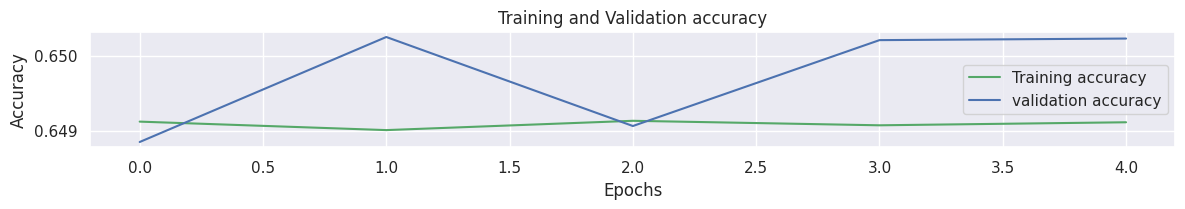

In [25]:
epoch_range = np.arange(1, history[-1].epoch[-1]+2)
train_accuracy = history[-1].history['accuracy']
val_accuracy = history[-1].history['val_accuracy']

plt.plot(train_accuracy, 'g', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Pretty Bad Result. Model is clearly **underfitting** and considering it is quite large now (respect to my budget) it is not possible to continuous this way. So, Deep Learning is not suitable for this purpose.

### B.3) Unsupervised Learning


Thereare a lot of Clustering methods and SkLearn is a powerful library for implementing them.  I am going to develop and evaluate four clustering methods. but on reality all of the suitable ones should be tried and evaluated. 

In [26]:
kmeans = KMeans(n_clusters=2, 
                random_state=0, 
                n_init="auto")
kmeans.fit(x_trainbk)
print(kmeans.score(x_testbk, y_testbk))

-1607.466959205403


In [27]:
mnb_mean = MiniBatchKMeans(n_clusters=2,
                           random_state=0,
                           batch_size=64,
                           n_init="auto")
mnb_mean.fit(x_trainbk)
print(mnb_mean.score(x_testbk, y_testbk))

-1441.2140419351367


In [28]:
brc = Birch(n_clusters=2,
            threshold=0.1)
brc.fit(x_trainbk)
y_hat = brc.predict(x_testbk)
print(metrics.r2_score(y_testbk, y_hat))

-1.0899434056361543


In [29]:
gm = GaussianMixture(n_components=2, 
                     random_state=0,
                     max_iter = 400,
                     covariance_type="spherical",
                     n_init=5,
                     init_params="random_from_data")
gm.fit(x_trainbk)
y_hatb = gm.predict(x_testbk)
print(metrics.r2_score(y_testbk, y_hatb))

-0.9376469575310626


Muble muble, clustering is bad for this task, I should try different hyperparameters, but I have lack of time so Unsupervised learning model development ends here. 

### B.4) REINFORCE Learning algorithm


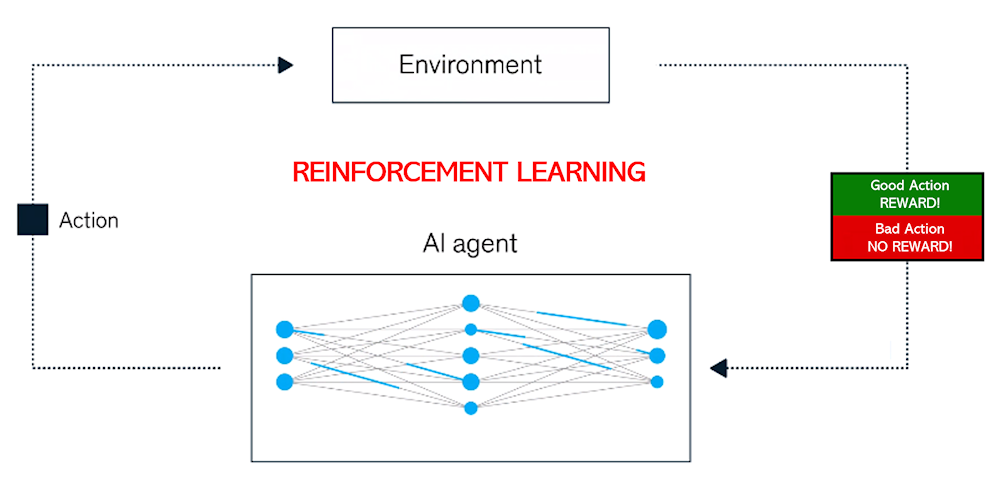

I took inspiration from:

**Gymnasium Documentation**

here the link: https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/

In addition, thank you 

Observation Space: https://gymnasium.farama.org/api/spaces/fundamental/#gymnasium.spaces.Box  *(I strongly suggest reading it)*

REINFORCE Cookbook: https://gymnasium.farama.org/tutorials/training_agents/reinforce_invpend_gym_v26/#sphx-glr-tutorials-training-agents-reinforce-invpend-gym-v26-py



#### B.4.1) Env inheritance

Reset state consists in x_trainbk[x_trainbk.index[randint]] with all its features. 

Why x_trainbk.index[randint] as index? Remember it is a shuffled Pandas dataframe and now indexes are not sorted.

Watch head below to understand.

In [30]:
x_trainbk.head(3)

,V1,V2,V3,V4,V5,V6,V9,V10,V11,V12,...,V16,V17,V18,V19,V20,V23,V24,V27,V28,Amount
304558,0.646956,0.932714,0.136434,0.767828,0.201001,0.411857,0.123268,0.064916,0.860436,0.034018,...,0.038451,0.274126,0.313365,0.503248,0.726598,0.479416,0.241203,0.090656,0.345388,0.222629
456976,0.157499,0.980199,0.040640,0.764060,0.127673,0.385887,0.111932,0.057054,0.807897,0.058406,...,0.023704,0.125462,0.110227,0.697232,0.737266,0.467104,0.261299,0.097233,0.342449,0.957500
435727,0.494786,0.944197,0.105412,0.825280,0.181446,0.415780,0.079319,0.036516,0.994535,0.003542,...,0.009084,0.084402,0.090717,0.616665,0.734756,0.479710,0.127492,0.106313,0.355478,0.785221


In [31]:
y_trainbk.head(3)

304558    1
456976    1
435727    1
Name: Class, dtype: int64

In [32]:
class FraudGameEnv(gym.Env):
    def __init__(self, step_n):
        super(FraudGameEnv, self).__init__()
        self.steps = step_n
        self.index = np.random.randint(low=0,
                                       high=x_trainbk.shape[0]-self.steps)
        self.start_pos = x_trainbk.loc[x_trainbk.index[self.index], :]
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(low=0.0, 
                                            high=1.0,
                                            shape=(x_trainbk.loc[x_trainbk.index[self.index], :].shape[0],) 
                                            )
    def reset(self, seed=None, options=None):
        self.index = np.random.randint(low=0,
                                       high=x_trainbk.shape[0]-self.steps)
        self.current_pos = x_trainbk.loc[x_trainbk.index[self.index], :]
        return (self.current_pos, self._get_info())
    def step(self, action):
        #reward mechanism
        if (action == y_trainbk[y_trainbk.index[self.index]]):
            reward = 1.0
            correct = True
        else:
            reward = 0.0
            correct = False
        self.index += 1
        self.current_pos = x_trainbk.loc[x_trainbk.index[self.index], :]
        info = self._get_info()
        return self.current_pos, reward, correct, False, info
    def _get_info(self):
        return {}

#### B.4.2) Load the environment


In [33]:
steps = 500

vector_dimension = int(steps)
gym.register(
    id="WhackAFrode-v0",
    entry_point="__main__:FraudGameEnv",
    max_episode_steps=steps)    

env = gym.make("WhackAFrode-v0",
               step_n=steps)

#### B.4.3) Creating the Policy


In [34]:
class Policy_Network(nn.Module):
    
    def __init__(self, obs_space_dims: int, action_space_dims: int):
        super().__init__()

        h_s1 = 32  
        h_s2 = 64 
        h_s3 = 512 
        h_s4 = 1024  
        h_s5 = 1024  
        h_s6 = 2048  
        h_s7 = 4096  
        h_s8 = 4096  
        h_s9 = 4096  
        h_s10 = 512  
        
        # Shared Network
        self.shared_net = nn.Sequential(
            nn.Linear(obs_space_dims, h_s1),
            nn.ReLU(),
            nn.Linear(h_s1, h_s2),
            nn.ReLU(),
            nn.Linear(h_s2, h_s3),
            nn.ReLU(),
            nn.Linear(h_s3, h_s4),
            nn.ReLU(),
            nn.Linear(h_s4, h_s5),
            nn.ReLU(),
            nn.Linear(h_s5, h_s6),
            nn.ReLU(),
            nn.Linear(h_s6, h_s7),
            nn.ReLU(),
            nn.Linear(h_s7, h_s8),
            nn.ReLU(),
            nn.Linear(h_s8, h_s9),
            nn.ReLU(),
            nn.Linear(h_s9, h_s10),
            nn.ReLU(),
            nn.Linear(h_s10, action_space_dims),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        action = self.shared_net(x.float())
        return action

#### B.4.3) Creating the agent

In [35]:
class REINFORCE:
    def __init__(self, obs_space_dims: int, action_space_dims: int):
        self.learning_rate = 1e-3  
        self.gamma = 0.99  
        self.eps = 5e-6  
        self.probs = []  
        self.rewards = []  
        self.net = Policy_Network(obs_space_dims, action_space_dims)
        self.optimizer = torch.optim.AdamW(self.net.parameters(), lr=self.learning_rate)
    def sample_action(self, state: np.ndarray) -> float:
        state = torch.tensor(np.array([state]))
        prob = self.net(state)[0]
        action = 1 if prob.detach().numpy() >= 0 else 0
        self.probs.append(prob)
        return action
    def update(self):
        running_g = 0
        gs = []
        for R in self.rewards[::-1]:
            running_g = R + self.gamma * running_g
            gs.insert(0, running_g)
        deltas = torch.tensor(gs)
        loss = 0
        for log_prob, delta in zip(self.probs, deltas):
            loss += log_prob.mean() * delta * (-1)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        self.probs = []
        self.rewards = []

#### B.4.4) Training the policy


In [36]:
episodes = int(1e3)

In [ ]:
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)

obs_space_dims = x_trainbk.loc[x_trainbk.index[0], :].shape[0]
action_space_dims = 1
agent = REINFORCE(obs_space_dims, action_space_dims)
for episode in range(episodes):
    reward_over_episodes = []
    env.reset()
    obs, info = wrapped_env.reset(seed=None)
    for _ in range(0, steps):
        action = agent.sample_action(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        agent.rewards.append(reward)
        reward_over_episodes.append(reward)
        agent.update()
    if(episode % 2 == 0):
        print("-------------------")
        print(f"{'Episode:' :<10}{episode}")
        print(f"Train Accuracy: {np.sum(reward_over_episodes)/steps :<.3}%")


In [ ]:
df1 = pd.DataFrame(reward_over_episodes).melt()
df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", data=df1).set(
    title="REINFORCE for Whack A Frode"
)
plt.show()

I apologize but this requires too many years to be run. Then I obmitted partial output results this script produced for this part.

In conlcusion, I cannot say anything about reinforce learning but this: it requires compiled programming language as C++, C# or 

byte-code style language like Java, or it will take a lot of time to compute in software architectures as the one I built. It doesn't matter.



**Machine Learning XGBoost** algorithm won the fight, cheers!!!

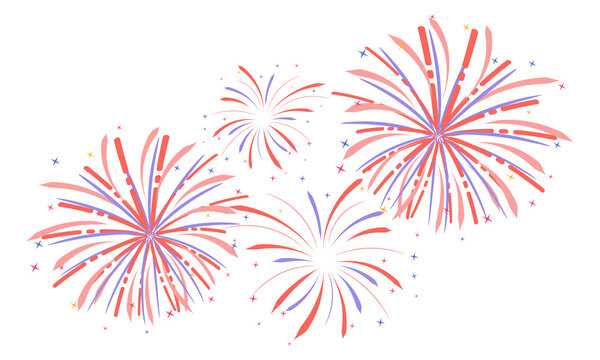